In [0]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision.datasets as dsets
import torchvision.transforms as transforms
import matplotlib.pylab as plt
import numpy as np



class Net(nn.Module):
  def __init__(self):
    super(Net,self).__init__()

    #convolution networks
    self.c1 = nn.Conv2d(1,6,3)
    self.c2 = nn.Conv2d(6,16,3)
    
    #linear layers
    self.l1 = nn.Linear(6*6*16,120)
    self.l2 = nn.Linear(120,84)
    self.l3 = nn.Linear(84,10)

  def forward(self,x):
    out = F.max_pool2d(F.relu(self.c1(x)),2)
    out = F.max_pool2d(F.relu(self.c2(out)),2)
    out = out.view(-1,self.flat(out))
    out = F.relu(self.l1(out))
    out = F.relu(self.l2(out))
    out = self.l3(out)
    return out

  def flat(self,x):
    dim = x.size()[1:]
    n_flat = 1
    for n in dim:
      n_flat *= n
    return n_flat



model = Net()


In [0]:
IMAGE_SIZE = 32
composed = transforms.Compose([transforms.Resize((IMAGE_SIZE,IMAGE_SIZE)),transforms.ToTensor()])

train_dataset = dsets.MNIST(root='./data',train=True,transform=composed,download=True)
validation_dataset = dsets.MNIST(root='./data',train=False,transform=composed,download=True)

criterion = nn.CrossEntropyLoss()
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=100)
validation_loader = torch.utils.data.DataLoader(dataset=validation_dataset, batch_size=5000)
epochs =3
learning_rate = 0.1
LOSS=[]
VAL=[]

In [0]:
def train():
  for epoch in range(epochs):

    for x,y in train_loader:
      model.zero_grad()
      z = model(x)
      loss = criterion(z,y)
      loss.backward()
      #step
      for p in model.parameters():
        p.data.sub_(p.grad.data*learning_rate)

    correct=0
    for x,y in validation_loader:
      z = model(x)
      _,yhat = z.max(1)
      correct+=(yhat==y).sum().item()
    
    accuracy = correct/len(validation_dataset)

    LOSS.append(loss.item())
    VAL.append(accuracy)
      

In [0]:
train()

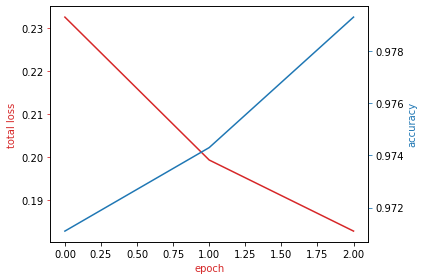

In [29]:
fig, ax1 = plt.subplots()
color = 'tab:red'
ax1.plot(LOSS, color=color)
ax1.set_xlabel('epoch', color=color)
ax1.set_ylabel('total loss', color=color)
ax1.tick_params(axis='y', color=color)
    
ax2 = ax1.twinx()  
color = 'tab:blue'
ax2.set_ylabel('accuracy', color=color)  
ax2.plot( VAL, color=color)
ax2.tick_params(axis='y', color=color)
fig.tight_layout()